__Predicting company ratings by benefits__  
   Manna Tóth  
   Python for Beginners  
   8/12/2019  

In [922]:
# Installing required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sck
import os

# 1. Preparing data 

## 1.1. Data cleaning
(importing, removing missing values and redundant columns, recoding, binarizing, creating rating categories)

In [923]:
# Importing dataset
df = pd.read_csv('glassdoor_python.csv') 
print (df)

     Unnamed: 0                     companynames  rating  reviews  \
0             0                               3M     3.9     2500   
1             1                              ABB     3.6     2800   
2             2                              ADP     3.7     7600   
3             3            ADT Security Services     2.7     2200   
4             4                            AECOM     3.2     4400   
5             5                              AIG     3.2     3700   
6             6                             ALDI     3.3     3200   
7             7                AMC Entertainment     3.1     2400   
8             8                              AMD     3.7     2100   
9             9                          Aaron's     3.1     1200   
10           10                           AbbVie     3.8     1100   
11           11                        Accenture     3.9    41000   
12           12                     Ace Hardware     3.6     1000   
13           13                   

In [924]:
#removing the first "Unnamed" column, which was generated while the data was transformed to csv from excel
df.drop(df.columns[0], axis=1, inplace=True)
#df.head()

In [925]:
# removing missing values from industry, size and revenue

df = df[df.revenue != 'Revenue Unknown / Non-Applicable']
df = df[df.industry != 'Industry Unknown']
#df = df[df.size != 'SizeUnknown'] There was only one such an observation which was deleted previously
#df.head()

__Recoding revenue and size to numerical (ordinary) variables by creating dictionarias__

In [926]:
# dictionary of size
size_code = {"Size1 to 50 employees":1,
             "Size51 to 200 employees":2,
             "Size201 to 500 employees":3,
             "Size501 to 1000 employees":4,
             "Size1001 to 5000 employees":5, 
             "Size5001 to 10000 employees":6,
             "Size10000+ employees":7}

In [927]:
#dictionary of revenue
revenue_code = {"Revenue Less than $1 million (USD) per year":1,
                "Revenue $5 to $10 million (USD) per year":2,              
                "Revenue $25 to $50 million (USD) per year":3,        
                "Revenue $50 to $100 million (USD) per year":4,
                "Revenue $100 to $500 million (USD) per year":5,    
                "Revenue $500 million to $1 billion (USD) per year":6,  
                "Revenue $1 to $2 billion (USD) per year":7,          
                "Revenue $2 to $5 billion (USD) per year":8,          
                "Revenue $5 to $10 billion (USD) per year":9,        
                "Revenue $10+ billion (USD) per year":10}            

In [928]:
# assigning dictionaries to the dataframe
df2 = df.replace({'size':size_code, 'revenue':revenue_code})
df2.head()

,companynames,rating,reviews,location,size,industry,revenue,benefit_ratings,Health_Insurance,Dental_Insurance,...,Tuition_Assistance,Accident_Insurance,Health_Care_On_Site,retire_401K,Unpaid_Extended_Leave,Bereavement_Leave,Professional_Development,sum,location_state,US
0,3M,3.9,2500,"Saint Paul, MN",7,Industry Miscellaneous Manufacturing,10,4.1,0,1,...,0,0,0,0,0,0,0,3,MN,1
1,ABB,3.6,2800,"Zurich, Switzerland",7,Industry Electrical & Electronic Manufacturing,10,3.6,1,1,...,0,1,1,1,1,1,1,38,Switzerland,0
2,ADP,3.7,7600,"Roseland, NJ",7,Industry Consulting,10,4.0,1,1,...,1,1,1,1,0,1,1,43,NJ,1
3,ADT Security Services,2.7,2200,"Boca Raton, FL",7,Industry Security Services,8,3.6,1,1,...,1,0,0,1,0,1,1,31,FL,1
4,AECOM,3.2,4400,"Los Angeles, CA",7,Industry Architectural & Engineering Services,10,3.2,1,1,...,0,1,0,1,0,0,0,23,CA,1


The following columns are removed:
+ location and location state - the US state where the location of the headquater of the company is, in this analyis cmopanies will be distingued based on binary variable US and non-US companies (US)
+ reviews - it shows the number of reviews, it was used to filter row data right after scraping, only observations with more than 1000 reviews were kept for further analysis
+ industry - the industry of the company

In [929]:
df2.drop(['reviews', 'location', 'location_state', 'industry'], axis=1, inplace=True)

In [930]:
df2

,companynames,rating,size,revenue,benefit_ratings,Health_Insurance,Dental_Insurance,FSA,Vision_iInsurance,HSA,...,Apprenticeship,Tuition_Assistance,Accident_Insurance,Health_Care_On_Site,retire_401K,Unpaid_Extended_Leave,Bereavement_Leave,Professional_Development,sum,US
0,3M,3.9,7,10,4.1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,3,1
1,ABB,3.6,7,10,3.6,1,1,1,1,1,...,0,0,1,1,1,1,1,1,38,0
2,ADP,3.7,7,10,4.0,1,1,1,1,1,...,0,1,1,1,1,0,1,1,43,1
3,ADT Security Services,2.7,7,8,3.6,1,1,1,1,1,...,0,1,0,0,1,0,1,1,31,1
4,AECOM,3.2,7,10,3.2,1,1,1,1,1,...,1,0,1,0,1,0,0,0,23,1
5,AIG,3.2,7,10,4.0,1,1,1,1,1,...,0,1,0,0,1,1,1,1,34,1
7,AMC Entertainment,3.1,7,8,2.8,1,1,1,1,1,...,1,1,1,1,1,1,1,1,40,1
8,AMD,3.7,6,8,3.6,1,1,0,1,1,...,0,0,0,0,1,0,1,0,15,1
9,Aaron's,3.1,7,8,3.5,1,1,1,1,1,...,0,0,0,0,1,0,1,0,19,1
10,AbbVie,3.8,7,10,4.1,1,1,1,1,1,...,0,1,1,1,1,0,1,1,45,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a25916358>]],
      dtype=object)

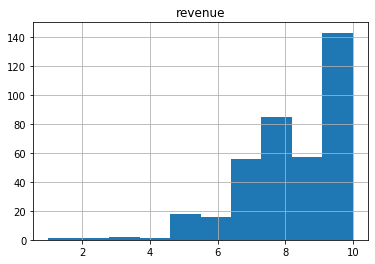

In [931]:
#checking distribution of revenue
df2.hist(column='revenue')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a259aca90>]],
      dtype=object)

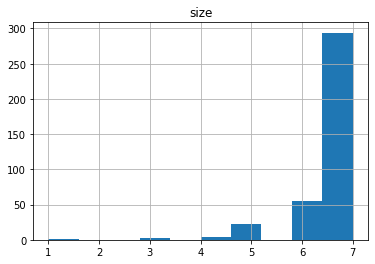

In [932]:
#checking distribution of size
df2.hist(column='size')

In [933]:
# I am going to keep only size 6-7 companies
df3 = df2.loc[df2['size'] >= 6 ]

In [934]:
df3

,companynames,rating,size,revenue,benefit_ratings,Health_Insurance,Dental_Insurance,FSA,Vision_iInsurance,HSA,...,Apprenticeship,Tuition_Assistance,Accident_Insurance,Health_Care_On_Site,retire_401K,Unpaid_Extended_Leave,Bereavement_Leave,Professional_Development,sum,US
0,3M,3.9,7,10,4.1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,3,1
1,ABB,3.6,7,10,3.6,1,1,1,1,1,...,0,0,1,1,1,1,1,1,38,0
2,ADP,3.7,7,10,4.0,1,1,1,1,1,...,0,1,1,1,1,0,1,1,43,1
3,ADT Security Services,2.7,7,8,3.6,1,1,1,1,1,...,0,1,0,0,1,0,1,1,31,1
4,AECOM,3.2,7,10,3.2,1,1,1,1,1,...,1,0,1,0,1,0,0,0,23,1
5,AIG,3.2,7,10,4.0,1,1,1,1,1,...,0,1,0,0,1,1,1,1,34,1
7,AMC Entertainment,3.1,7,8,2.8,1,1,1,1,1,...,1,1,1,1,1,1,1,1,40,1
8,AMD,3.7,6,8,3.6,1,1,0,1,1,...,0,0,0,0,1,0,1,0,15,1
9,Aaron's,3.1,7,8,3.5,1,1,1,1,1,...,0,0,0,0,1,0,1,0,19,1
10,AbbVie,3.8,7,10,4.1,1,1,1,1,1,...,0,1,1,1,1,0,1,1,45,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a22ffdcf8>]],
      dtype=object)

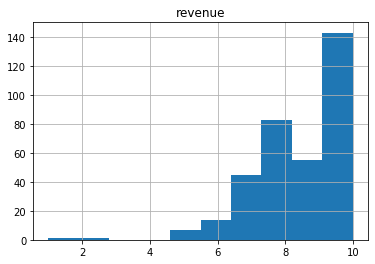

In [935]:
#checking distribution of revenue on the new data 
df3.hist(column='revenue')

In [936]:
#len(df2[df2['size']==4]) #294 companies are in size 7, 55 in size 6, 23 in size 5

In [937]:
len(df3[df3['revenue']==9]) #294 companies are in size 7, 55 in size 6, 23 in size 5

55

In [938]:
# I am going to keep only revenues at least 7 companies
df4 = df3.loc[df2['revenue'] >= 7 ]

In [939]:
df4 #326 rows

,companynames,rating,size,revenue,benefit_ratings,Health_Insurance,Dental_Insurance,FSA,Vision_iInsurance,HSA,...,Apprenticeship,Tuition_Assistance,Accident_Insurance,Health_Care_On_Site,retire_401K,Unpaid_Extended_Leave,Bereavement_Leave,Professional_Development,sum,US
0,3M,3.9,7,10,4.1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,3,1
1,ABB,3.6,7,10,3.6,1,1,1,1,1,...,0,0,1,1,1,1,1,1,38,0
2,ADP,3.7,7,10,4.0,1,1,1,1,1,...,0,1,1,1,1,0,1,1,43,1
3,ADT Security Services,2.7,7,8,3.6,1,1,1,1,1,...,0,1,0,0,1,0,1,1,31,1
4,AECOM,3.2,7,10,3.2,1,1,1,1,1,...,1,0,1,0,1,0,0,0,23,1
5,AIG,3.2,7,10,4.0,1,1,1,1,1,...,0,1,0,0,1,1,1,1,34,1
7,AMC Entertainment,3.1,7,8,2.8,1,1,1,1,1,...,1,1,1,1,1,1,1,1,40,1
8,AMD,3.7,6,8,3.6,1,1,0,1,1,...,0,0,0,0,1,0,1,0,15,1
9,Aaron's,3.1,7,8,3.5,1,1,1,1,1,...,0,0,0,0,1,0,1,0,19,1
10,AbbVie,3.8,7,10,4.1,1,1,1,1,1,...,0,1,1,1,1,0,1,1,45,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a23e8ecc0>]],
      dtype=object)

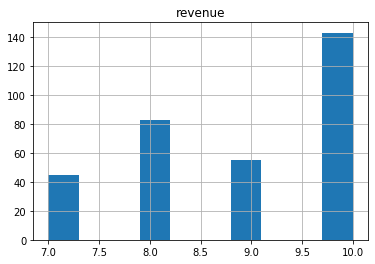

In [940]:
df4.hist(column='revenue')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a23e76908>]],
      dtype=object)

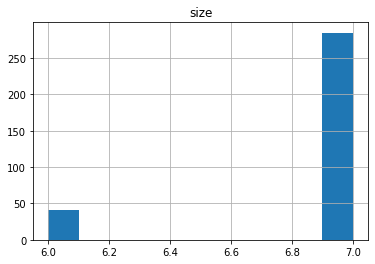

In [941]:
df4.hist(column='size')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a23fb3cc0>]],
      dtype=object)

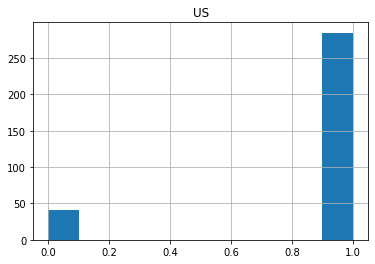

In [942]:
df4.hist(column='US')

__Creating rating categories for he classification examinations__


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a25f046d8>]],
      dtype=object)

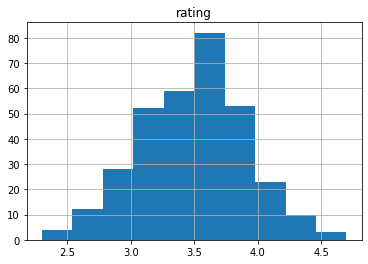

In [943]:
# checking the distribution of ratings
df4.hist(column='rating')

from the histogram above, I have decided to create 2 categories: 
good: from 3.8; bad: smaller than 3.8

In [944]:
# creating the categories
bins = [0, 3.8, np.inf]
name = [ 0, 1] #0 for bad, 1 for good, classification models have problem with the string format
df4['RatingCat'] = pd.cut(df4['rating'], bins, labels=name)
df4

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,companynames,rating,size,revenue,benefit_ratings,Health_Insurance,Dental_Insurance,FSA,Vision_iInsurance,HSA,...,Tuition_Assistance,Accident_Insurance,Health_Care_On_Site,retire_401K,Unpaid_Extended_Leave,Bereavement_Leave,Professional_Development,sum,US,RatingCat
0,3M,3.9,7,10,4.1,0,1,1,0,0,...,0,0,0,0,0,0,0,3,1,1
1,ABB,3.6,7,10,3.6,1,1,1,1,1,...,0,1,1,1,1,1,1,38,0,0
2,ADP,3.7,7,10,4.0,1,1,1,1,1,...,1,1,1,1,0,1,1,43,1,0
3,ADT Security Services,2.7,7,8,3.6,1,1,1,1,1,...,1,0,0,1,0,1,1,31,1,0
4,AECOM,3.2,7,10,3.2,1,1,1,1,1,...,0,1,0,1,0,0,0,23,1,0
5,AIG,3.2,7,10,4.0,1,1,1,1,1,...,1,0,0,1,1,1,1,34,1,0
7,AMC Entertainment,3.1,7,8,2.8,1,1,1,1,1,...,1,1,1,1,1,1,1,40,1,0
8,AMD,3.7,6,8,3.6,1,1,0,1,1,...,0,0,0,1,0,1,0,15,1,0
9,Aaron's,3.1,7,8,3.5,1,1,1,1,1,...,0,0,0,1,0,1,0,19,1,0
10,AbbVie,3.8,7,10,4.1,1,1,1,1,1,...,1,1,1,1,0,1,1,45,1,0


In [945]:
len(df4[df4['RatingCat']==1]) # 64 companies, about 20% good

64

In [946]:
#len(df4)

In [947]:
# saving cleaned and transformed data 
df4.to_csv("glassdoor_SVR.csv")

## 1.2. Creating train test  dataset (80-20 %)

not including rating, (x = explanatory variables, y = RatingCat)
                        

In [948]:
df4

,companynames,rating,size,revenue,benefit_ratings,Health_Insurance,Dental_Insurance,FSA,Vision_iInsurance,HSA,...,Tuition_Assistance,Accident_Insurance,Health_Care_On_Site,retire_401K,Unpaid_Extended_Leave,Bereavement_Leave,Professional_Development,sum,US,RatingCat
0,3M,3.9,7,10,4.1,0,1,1,0,0,...,0,0,0,0,0,0,0,3,1,1
1,ABB,3.6,7,10,3.6,1,1,1,1,1,...,0,1,1,1,1,1,1,38,0,0
2,ADP,3.7,7,10,4.0,1,1,1,1,1,...,1,1,1,1,0,1,1,43,1,0
3,ADT Security Services,2.7,7,8,3.6,1,1,1,1,1,...,1,0,0,1,0,1,1,31,1,0
4,AECOM,3.2,7,10,3.2,1,1,1,1,1,...,0,1,0,1,0,0,0,23,1,0
5,AIG,3.2,7,10,4.0,1,1,1,1,1,...,1,0,0,1,1,1,1,34,1,0
7,AMC Entertainment,3.1,7,8,2.8,1,1,1,1,1,...,1,1,1,1,1,1,1,40,1,0
8,AMD,3.7,6,8,3.6,1,1,0,1,1,...,0,0,0,1,0,1,0,15,1,0
9,Aaron's,3.1,7,8,3.5,1,1,1,1,1,...,0,0,0,1,0,1,0,19,1,0
10,AbbVie,3.8,7,10,4.1,1,1,1,1,1,...,1,1,1,1,0,1,1,45,1,0


In [949]:
#creating y for regression (keeping only the rating)
y_classification = df4[['RatingCat']].copy() #we need .copy to in order to make sure the original data remains intact 
y_classification.head()

,RatingCat
0,1
1,0
2,0
3,0
4,0


In [950]:
#creating x for regression (keeping othe explanatory variables except for ratingcat, and no rating)
X_classification = df4.iloc[:, 2:62].copy()
X_classification.head()

,size,revenue,benefit_ratings,Health_Insurance,Dental_Insurance,FSA,Vision_iInsurance,HSA,Life_Insurance,SLI,...,Tuition_Assistance,Accident_Insurance,Health_Care_On_Site,retire_401K,Unpaid_Extended_Leave,Bereavement_Leave,Professional_Development,sum,US,RatingCat
0,7,10,4.1,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,3,1,1
1,7,10,3.6,1,1,1,1,1,1,1,...,0,1,1,1,1,1,1,38,0,0
2,7,10,4.0,1,1,1,1,1,1,1,...,1,1,1,1,0,1,1,43,1,0
3,7,8,3.6,1,1,1,1,1,1,1,...,1,0,0,1,0,1,1,31,1,0
4,7,10,3.2,1,1,1,1,1,1,1,...,0,1,0,1,0,0,0,23,1,0


In [951]:
# removing benefit ratings
X_classification.drop('benefit_ratings', axis=1, inplace=True)

In [952]:
# removing ratingcat
X_classification.drop('RatingCat', axis=1, inplace=True)

In [953]:
X_classification.head()

,size,revenue,Health_Insurance,Dental_Insurance,FSA,Vision_iInsurance,HSA,Life_Insurance,SLI,Disability_Insurance,...,Apprenticeship,Tuition_Assistance,Accident_Insurance,Health_Care_On_Site,retire_401K,Unpaid_Extended_Leave,Bereavement_Leave,Professional_Development,sum,US
0,7,10,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,1
1,7,10,1,1,1,1,1,1,1,1,...,0,0,1,1,1,1,1,1,38,0
2,7,10,1,1,1,1,1,1,1,1,...,0,1,1,1,1,0,1,1,43,1
3,7,8,1,1,1,1,1,1,1,1,...,0,1,0,0,1,0,1,1,31,1
4,7,10,1,1,1,1,1,1,1,1,...,1,0,1,0,1,0,0,0,23,1


In [954]:
#splitting data to test, train 
from sklearn.model_selection import train_test_split
X_trainC, X_testC, y_trainC, y_testC = train_test_split(X_classification, y_classification, test_size=0.15, random_state=77)

In [955]:
#X_trainC

In [956]:
#y_trainC

In [957]:
y_trainC.describe(include='all')

,RatingCat
count,277
unique,2
top,0
freq,225


In [958]:
y_trainC.RatingCat.value_counts() #80% bad

0    225
1     52
Name: RatingCat, dtype: int64

In [959]:
y_testC.RatingCat.value_counts() #80% bad

0    37
1    12
Name: RatingCat, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a25667a20>]],
      dtype=object)

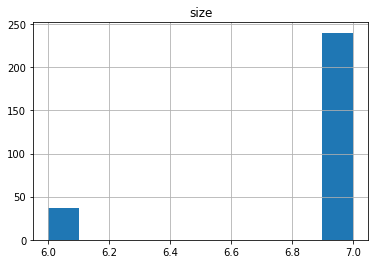

In [960]:
X_trainC.hist(column='size')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a25667fd0>]],
      dtype=object)

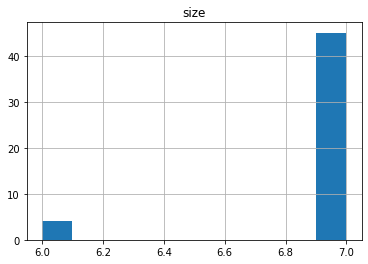

In [961]:
X_testC.hist(column='size')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2577cc88>]],
      dtype=object)

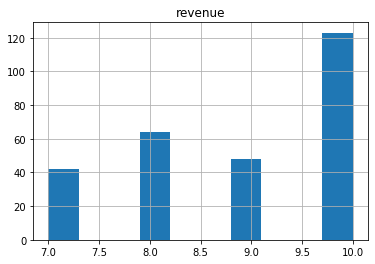

In [962]:
X_trainC.hist(column='revenue')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2577c710>]],
      dtype=object)

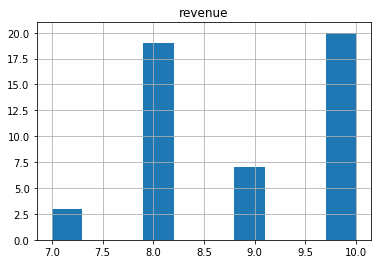

In [963]:
X_testC.hist(column='revenue')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a25b0acc0>]],
      dtype=object)

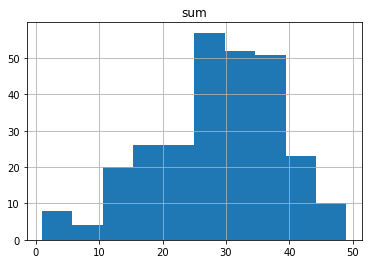

In [964]:
X_trainC.hist(column='sum')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a25c187b8>]],
      dtype=object)

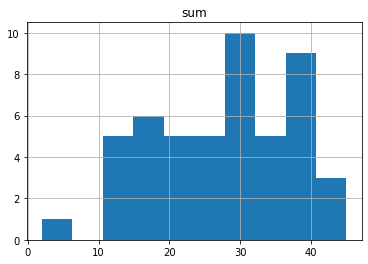

In [965]:
X_testC.hist(column='sum')

# 2. CONDUCTING THE MODELS

## 2.2. Classifications

#### 2.2.1. Logistic regression

I got the following error message:
"//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)"

In [966]:
#to deal with this error message, the following changes of y_trainC were adopted:
ytC = np.ravel(y_trainC)

In [967]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
logreg = LogisticRegression(solver='lbfgs', max_iter=500) #Ilbfgs produces the highest accuracy score
logreg.fit(X_trainC,ytC)
y_pred_logreg = logreg.predict(X_testC)
accuracy_score_logreg = accuracy_score(y_testC,y_pred_logreg)
accuracy_score_logreg #the accuracy score did not changed with the number of iterations

0.7959183673469388

 #### 2.2.2. K-Nearest Neighbors

In [968]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_trainC,ytC) #same error message 
y_pred_knn = knn.predict(X_testC)
accuracy_score_knn = accuracy_score(y_testC,y_pred_knn)
accuracy_score_knn

0.7551020408163265

#### 2.2.3. Support Vector Machines (SVC)
selfnote: Import SVC - C means classification


In [970]:
from sklearn.svm import SVC
cl2 = SVC(kernel='poly', gamma='scale')
cl2.fit(X_trainC,ytC)
y_pred_SVC =cl2.predict(X_testC)
accuracy_score_SVC_p = accuracy_score(y_testC,y_pred_SVC)
accuracy_score_SVC_p #The accuracy score of the polynomial kernel is higher, so this will be used for further comparison

0.7551020408163265

#### 2.2.4. Stochastic Gradient Descent

In [971]:
from sklearn.linear_model import SGDClassifier

Warning at SKlearning: Warning Make sure you permute (shuffle) your training data before fitting the model or use shuffle=True to shuffle after each iteration.

In [972]:
vvv = SGDClassifier(loss="hinge", penalty="l2", max_iter=1000, shuffle=True, early_stopping=False, validation_fraction=0.15, n_iter_no_change=5)
vvv.fit(X_trainC,ytC)
y_pred_SGD_c = vvv.predict(X_testC)
accuracy_score_SGD_c = accuracy_score(y_testC,y_pred_SGD_c)
accuracy_score_SGD_c 


0.7551020408163265

#### Which is the best classification model?

In [973]:
#creating a dataframe from the values
data1 = {'accuracy score': [accuracy_score_logreg, accuracy_score_knn, accuracy_score_SVC_p, accuracy_score_SGD_c]}
classification_comparison_data = pd.DataFrame(data1)
classification_comparison_data

,accuracy score
0,0.795918
1,0.755102
2,0.755102
3,0.755102


In [974]:
#renaming rows
idx_rename2 = {0:'logreg', 1:'knn', 2:'SVC', 3:'SGD'}
classification_data = classification_comparison_data.rename(index=idx_rename2)
classification_data 

,accuracy score
logreg,0.795918
knn,0.755102
SVC,0.755102
SGD,0.755102


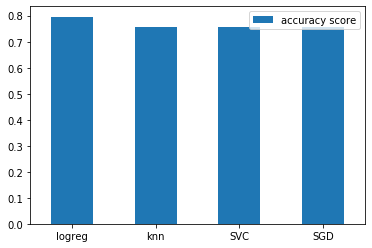

In [975]:
classification_data.plot.bar(y='accuracy score', rot=0) 

##### Logistic regression futher calculations

In [976]:
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectKBest, chi2

In [977]:
from sklearn import metrics
score = logreg.score(X_testC, y_testC)
print(score)

0.7959183673469388


In [978]:
#calculating recall
metrics.recall_score(y_testC,y_pred_logreg)

0.16666666666666666

In [979]:
#calculationg precision
metrics.precision_score(y_testC,y_pred_logreg)

1.0

In [980]:
#f1 score
metrics.f1_score(y_testC,y_pred_logreg)

0.2857142857142857

#support
metrics.classification_report(y_testC,y_pred_logreg)

[[37  0]
 [10  2]]


Text(0.5, 257.44, 'Predicted label')

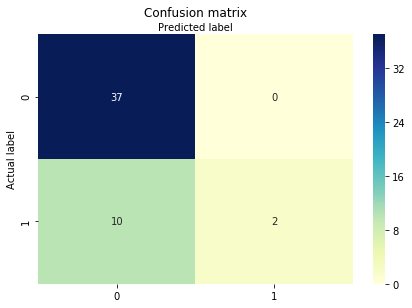

In [981]:
import seaborn as sns
from sklearn import metrics

#confusion matrix

cm = metrics.confusion_matrix(y_testC, y_pred_logreg)
print(cm)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [982]:
#precision, recall, F-measure and support
from sklearn.metrics import classification_report
print(classification_report(y_testC, y_pred_logreg))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88        37
           1       1.00      0.17      0.29        12

    accuracy                           0.80        49
   macro avg       0.89      0.58      0.58        49
weighted avg       0.84      0.80      0.74        49



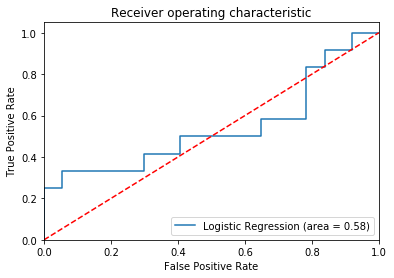

In [983]:
#ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_testC, logreg.predict(X_testC))
fpr, tpr, thresholds = roc_curve(y_testC, logreg.predict_proba(X_testC)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [984]:
#coefficient of variables
coef = logreg.coef_[0]
print (coef)

[-0.2400123  -0.23721183  0.25343918  0.29659239  0.80405469 -0.88848293
 -0.08304642  0.6049999   0.19432466 -0.4596667   0.1133312   0.30950322
 -0.58998003  0.12926211  0.         -0.43041383 -0.45766028  0.17279369
  0.17945387 -0.45416564 -0.21632576 -0.10845266  0.15267638 -0.16677358
  0.08917    -0.08999144  0.08139919  0.16047263  0.01121157  0.39336511
 -1.05746028  0.57121546  0.04593303 -0.18093191  0.42542574 -0.03705746
 -0.17591135 -0.03068996  0.09641851  0.30091038  0.95783707 -0.26683172
 -0.4669095  -0.05171293  0.6754092   0.10054138  0.42152915  0.06950309
 -0.28805231 -0.28264784  0.44232405  0.08924346 -0.53876     0.59079022
 -1.20406485 -0.13145982  0.07568136  0.46728486]


In [1003]:
coef_table = pd.DataFrame({'name':list(X_trainC.columns),
                                      'coef':coef})
coef_table.sort_values(by='coef', ascending=False).head()


,name,coef
40,Pet_Friendly,0.957837
4,FSA,0.804055
44,Travel_Concierge,0.675409
7,Life_Insurance,0.605000
53,Unpaid_Extended_Leave,0.590790


In [986]:
coef_table.to_csv("glass.csv")

In [987]:
#univariate feature selection
select_feature = SelectKBest(chi2, k=5).fit(X_trainC,ytC)

In [1002]:
selected_features_df = pd.DataFrame({'Feature':list(X_trainC.columns),
                                     'Scores':select_feature.scores_})
selected_features_df.sort_values(by='Scores', ascending=False).head(10)

,Feature,Scores
56,sum,18.684561
40,Pet_Friendly,7.985651
34,Sabbatical,7.097438
44,Travel_Concierge,6.607536
50,Accident_Insurance,4.779686
53,Unpaid_Extended_Leave,4.610615
11,Retiree_Health,4.133376
26,Childcare,2.877923
39,Commuter_Checks,2.571725
13,Pension_Plan,2.139953


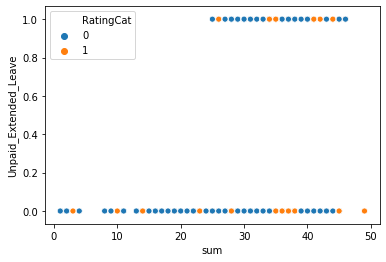

In [989]:
# plotting the scatterplot of sum and unpaid extended leave and the rating categories
import seaborn as sns
sns.scatterplot(x='sum', y='Unpaid_Extended_Leave', hue='RatingCat', data=df4)

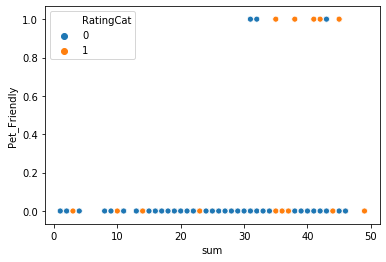

In [990]:
# plotting the scatterplot of sum and pet friendly and the rating categories
import seaborn as sns
sns.scatterplot(x='sum', y='Pet_Friendly', hue='RatingCat', data=df4)

In [991]:
#recursive feature selection
rfe = RFE(estimator=logreg, step=1)
rfe = rfe.fit(X_trainC,ytC)

selected_rfe_features = pd.DataFrame({'Feature':list(X_trainC.columns),
                                      'Ranking':rfe.ranking_})
selected_rfe_features.sort_values(by='Ranking')

In [1006]:
# RFE best 3 features
model = LogisticRegression(solver='lbfgs', max_iter=1000)
rfe = RFE(model, 3)
fit = rfe.fit(X_trainC,ytC)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))
print(fit.support_)

Num Features: 3
Selected Features: [False False False False False False False  True False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False  True False False False  True False False False
 False False False False False False False False False False]
Feature Ranking: [31 29 13 21  5  4 46  1 22 14 33 17 19 34 56 20 27 28 30 23 40 48 25 44
 38 47 41 32 55 11  2  8 51 43  6 53 42 54 39 18  1 37 16 52  1 36 15 50
 26 24 10 35 12  3  7 45 49  9]
[False False False False False False False  True False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False  True False False False  True False False False
 False False False False False False False False False False]


In [1008]:
selected_rfe_features2 = pd.DataFrame({'Feature':list(X_trainC.columns),
                                      'Ranking':rfe.ranking_, 'num_features':fit.n_features_, 'sel_features':fit.support_, 'feat_ranking':fit.ranking_})
selected_rfe_features2.sort_values(by='Ranking').head(3)

,Feature,Ranking,num_features,sel_features,feat_ranking
40,Pet_Friendly,1,3,True,1
44,Travel_Concierge,1,3,True,1
7,Life_Insurance,1,3,True,1


In [994]:
# RFE best 5 features
model = LogisticRegression (solver='lbfgs', max_iter=1000)
rfe = RFE(model, 5)
fit = rfe.fit(X_trainC,ytC)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))
print(fit.support_)

Num Features: 5
Selected Features: [False False False False False False False  True False False False False
 False False False False False False False False False False False False
 False False False False False False  True False False False False False
 False False False False  True False False False  True False False False
 False False False False False  True False False False False]
Feature Ranking: [29 27 11 19  3  2 44  1 20 12 31 15 17 32 54 18 25 26 28 21 38 46 23 42
 36 45 39 30 53  9  1  6 49 41  4 51 40 52 37 16  1 35 14 50  1 34 13 48
 24 22  8 33 10  1  5 43 47  7]
[False False False False False False False  True False False False False
 False False False False False False False False False False False False
 False False False False False False  True False False False False False
 False False False False  True False False False  True False False False
 False False False False False  True False False False False]


In [1004]:
selected_rfe_features2 = pd.DataFrame({'Feature':list(X_trainC.columns),
                                      'Ranking':rfe.ranking_, 'num_features':fit.n_features_, 'sel_features':fit.support_, 'feat_ranking':fit.ranking_})
selected_rfe_features2.sort_values(by='Ranking').head(5)

,Feature,Ranking,num_features,sel_features,feat_ranking
31,Paid_time_off,1,10,True,1
34,Sabbatical,1,10,True,1
40,Pet_Friendly,1,10,True,1
44,Travel_Concierge,1,10,True,1
4,FSA,1,10,True,1


In [996]:
#RFE best 10 features
model = LogisticRegression (solver='lbfgs', max_iter=1000)
rfe = RFE(model, 10)
fit = rfe.fit(X_trainC,ytC)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))
print(fit.support_)

Num Features: 10
Selected Features: [False False False False  True  True False  True False False False False
 False False False False False False False False False False False False
 False False False False False False  True  True False False  True False
 False False False False  True False False False  True False False False
 False False False False False  True  True False False False]
Feature Ranking: [24 22  6 14  1  1 39  1 15  7 26 10 12 27 49 13 20 21 23 16 33 41 18 37
 31 40 34 25 48  4  1  1 44 36  1 46 35 47 32 11  1 30  9 45  1 29  8 43
 19 17  3 28  5  1  1 38 42  2]
[False False False False  True  True False  True False False False False
 False False False False False False False False False False False False
 False False False False False False  True  True False False  True False
 False False False False  True False False False  True False False False
 False False False False False  True  True False False False]


In [1005]:
selected_rfe_features2 = pd.DataFrame({'Feature':list(X_trainC.columns),
                                      'Ranking':rfe.ranking_, 'num_features':fit.n_features_, 'sel_features':fit.support_, 'feat_ranking':fit.ranking_})
selected_rfe_features2.sort_values(by='Ranking').head(10)

,Feature,Ranking,num_features,sel_features,feat_ranking
31,Paid_time_off,1,10,True,1
34,Sabbatical,1,10,True,1
40,Pet_Friendly,1,10,True,1
44,Travel_Concierge,1,10,True,1
4,FSA,1,10,True,1
5,Vision_iInsurance,1,10,True,1
54,Bereavement_Leave,1,10,True,1
7,Life_Insurance,1,10,True,1
30,Paid_Holiday,1,10,True,1
53,Unpaid_Extended_Leave,1,10,True,1


In [998]:
#recursive feature elimination with cross validation
rfecv = RFECV(estimator=logreg, step=1, cv=5, scoring='accuracy')
rfecv = rfecv.fit(X_trainC,ytC)
print('Optimal number of features :', rfecv.n_features_)
print('Best features :', X_trainC.columns[rfecv.support_])

Optimal number of features : 1
Best features : Index(['Pet_Friendly'], dtype='object')


In [999]:
rfecv.grid_scores_

array([0.81233766, 0.8087013 , 0.8087013 , 0.80506494, 0.80142857,
       0.80506494, 0.8087013 , 0.80519481, 0.79064935, 0.79798701,
       0.80155844, 0.80155844, 0.80162338, 0.79428571, 0.79428571,
       0.79435065, 0.80162338, 0.79798701, 0.79071429, 0.78707792,
       0.79071429, 0.79071429, 0.78714286, 0.78350649, 0.78707792,
       0.78707792, 0.77266234, 0.77623377, 0.77253247, 0.77616883,
       0.77980519, 0.77980519, 0.7725974 , 0.76538961, 0.7725974 ,
       0.77616883, 0.77616883, 0.77616883, 0.77616883, 0.7725974 ,
       0.7725974 , 0.7725974 , 0.7725974 , 0.76896104, 0.76896104,
       0.76896104, 0.76896104, 0.7725974 , 0.7725974 , 0.7725974 ,
       0.7725974 , 0.7725974 , 0.7725974 , 0.7725974 , 0.7725974 ,
       0.7725974 , 0.7725974 , 0.7725974 ])

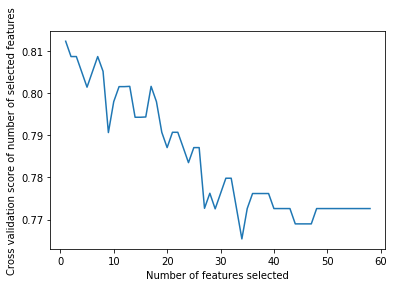

In [875]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()